# Gaussian Process Regression


________
###  Table of content

[1. Regression model](#model)<br>
[2. Prediction](#Prediction)<br>
[3. Finding the best kernel parameters](#kernel)<br>
_________

**Dataset :**

Let $(X_i)_{i\in[\![1,n]\!]}$ be i.i.d. random variables in $\mathbb{R}^d$ and consider the matrix $X \in \mathbb{R}^{n . d}$ such that the i-th row of $X$ is the observation $X_i^T$. For all $1 \leq i \leq n$, $X_i$ is an individual which has been associated with the label $Y_i \in \mathbb{R}$, and consider the matrix $Y = [Y_1, Y_2, ..., Y_n]^T \in \mathbb{R}^n$.

<a id='model'></a>
## 1. Regression model

In the Gaussian process regression model, $Y = f(X) + \epsilon$. 
<br><br>
The $(\epsilon_i)_{i\in[\![1,n]\!]} \in \mathbb{R}^n$ are the i.i.d. noise variables with independant normal distributions, so that $\epsilon = [\epsilon_1, \epsilon_2, ... \epsilon_n]^T \sim N(0, \sigma ^2 I_n)$.
$ f$ is a Gaussian Process, i.e. an n-dimensional vector, defined by :


$$
f(.) \sim \mathcal{GP}(0, k_{\gamma}(. , .))
$$

where $k_{\gamma}(. , .)$ is a valid covariance function and $\gamma$ is the parameter to optimize.

A commonly used kernel function is the squared exponential or radial basis function (RBF) kernel, defined as follows:

$$k_\gamma (z, z') = \exp(-\frac{\parallel z - z' \parallel ^2}{2 \gamma^2})$$


<a id='prediction'></a>
## 2. Prediction

Gaussian Process Regression is a nonparametric model. Therein, prediction will be directly performed using the conditionnal gaussian distribution.

Given a dataset of observed outputs $ \lbrace (x_i, y_i) \rbrace_{1 \leq i \leq n}$, we want to predict the output $Y_{test}$ of a test set $X_{test}$ drawn from the same distribution.


With $Y_0 = [Y_{test}, Y]^T$, $X_0 = [X_{test}, X]^T$ and $\epsilon_0 = [0, \epsilon]^T$, the model is thus :


$$Y_0 = f(X_0) + \epsilon_0 \sim N(0, K_0 + \sigma^2I_n)$$


where 
$$K_0 = \begin{pmatrix}
          K_{aa} & K_{ab} \\
          K_{ba} & K_{bb} \\
         \end{pmatrix}$$ and 
$$\begin{equation}
    \begin{cases}
      K_{aa} = (k_\gamma(X_i, X_j))\\
      K_{ab} = (k_\gamma(X_i, X_{test, j}))\\
      K_{ba} = (k_\gamma(X_{test, i}, X_j))\\
      K_{bb} = (k_\gamma(X_{test, i}, X_{test, j}))
    \end{cases}       
\end{equation}$$

We can then compute the conditional distribution $(Y_{test}|X_{test}, X, Y) \sim \mathcal{N}(m, D)$ by using the conditional Gaussian distribution formulas :


$$\begin{equation}
    \begin{cases}
      m = K_{ab}K_{bb}^{-1}Y\\
      D = (K_{aa} + \sigma^2I_n) - K_{ab}K_{bb}^{-1}K_{ba}
    \end{cases}       
\end{equation}$$


<a id='kernel'></a>
## 3. Finding the best kernel parameters

With $X$, $Y$ and $\epsilon$ as previously defined, let's apply the model to the dataset : $Y = f(X) + \epsilon$.

As f(.) is a Gaussian Process, $f(X) \sim N(0, K_\gamma)$ where $K_\gamma = (k_\gamma (X_i, X_j))_{i,j \in [\![1,n]\!]}$, and since $\epsilon \sim N(0, \sigma ^2 I_n)$, it implies that $ (Y | X; \gamma) \sim N(0, K_\gamma + \sigma ^2 I_n)$.

Consequently, the probability distribution is:  
$$P(Y=y | X; \gamma) = \frac{1}{(2\pi)^{n/2} det(K_\gamma + \sigma^2 I_n)^{1/2}}exp(-\frac{1}{2} y^T (K_\gamma + \sigma^2 I_n)^{-1} y)$$


The likelihood of the model, given the observed data, is defined as:  
$$L(\gamma) = P(Y=y | X; \gamma)$$


The aim of the training is to find the parameters $\gamma$ which maximizes the likelihood function (Maximum Likelihood Estimation), which is the same as minimizing the negative log-likelihood. To unify with the neural network architecture used later, we chose to minimize the negative log-likelihood :  
$$l(\gamma) = - \log (P(Y=y | X; \gamma))$$


The resulting equation is thus:  
$$l(\gamma) = \frac{1}{2} ( n\log(2\pi) + \log det(K_\gamma + \sigma^2 I_n) + y^T (K_\gamma + \sigma^2 I_n)^{-1} y )$$

To simplify this, we can rewrite $K_\gamma + \sigma ^2 I_n$ as $K_\gamma$.

Again, to unify this with the neural network approach (based on the chain rule), we need to compute the derivative of the negative log-likelihood with respect to $K_\gamma$ :  
$$\frac {\partial l}{\partial K_\gamma} = \frac{1}{2} ( \frac {\partial n\log(2\pi)}{\partial K_\gamma} + \frac {\partial \log det K_\gamma }{\partial K_\gamma} + \frac {\partial y^T K_\gamma^{-1} y )}{\partial K_\gamma})$$


Pre-requisites :
$$\begin{equation}
    \begin{cases}
      \frac {\partial \log \det A}{\partial A} = A^{-1}\\
      \frac {\partial A^{-1}}{\partial A} = -(A^{-1}) (A^{-1})\\
    \end{cases}       
\end{equation}$$

Consequently :
$$\begin{equation}
    \begin{cases}
      \frac {\partial n\log(2\pi)}{\partial K_\gamma} = 0\\
      \frac {\partial \log det K_\gamma}{\partial K_\gamma} = K_\gamma ^{-1}\\
      \frac {\partial y^T K_\gamma^{-1} y}{\partial K_\gamma} = - K_\gamma^{-1} y y^T K_\gamma^{-1}
    \end{cases}       
\end{equation}$$


> PROOF for $\frac {\partial y^T K_\gamma^{-1} y}{\partial K_\gamma} = - K_\gamma^{-1} y y^T K_\gamma^{-1}$ :
>
> As $y^T K_\gamma^{-1} y = \sum_{i,j} y_i y_j (K_\gamma^{-1})_{i,j}$, 
> $$\frac {\partial y^T K^{-1} y}{\partial K_{k,l}} = \sum_{i,j} y_i y_j (\frac {\partial K^{-1}} {\partial K_{k,l}})_{i,j}$$ 
>
> Given that $\frac {\partial K^{-1}} {\partial K_{k,l}} =  - K^{-1} \frac {\partial K}{\partial K_{k,l}} K^{-1}$  and that the derivative with respect to the coordinate (k,l) is equal to a (n,n) null matrix with a 1 at position (k,l),  it ends up with the following equation:
> $$\frac {\partial K^{-1}} {\partial K_{k,l}} =  - K^{-1} \frac {\partial K}{\partial K_{k,l}} K^{-1} = - [(K^{-1}_{ik} K^{-1}_{lj})_{i,j}]$$
> Consequently :
$$(\frac {\partial K^{-1}} {\partial K_{k,l}})_{i,j} = - K^{-1}_{ik} K^{-1}_{lj}$$
Finally, the derivative equals : 
$$\frac {\partial y^T K^{-1} y}{\partial K_{k,l}} = \sum_{i,j} - y_i y_j K^{-1}_{ik} K^{-1}_{lj}.$$
>
> This may be written as :
> $$\frac {\partial y^T K^{-1} y}{\partial K_\gamma}  = - K_\gamma^{-1} y y^T K_\gamma^{-1}$$

Finally :  
$$\frac {\partial l}{\partial K_\gamma} = \frac{1}{2} (K_\gamma ^{-1} - K_\gamma^{-1} y y^T K_\gamma^{-1})$$


In Deep Kernel Learning, we have $K_{\gamma, w} = (k_\gamma (h_w(X_i), h_w(X_j))_{i,j \in [|1,n|]})$ where $h_w(.)$ represents the Neural Network.


During the backpropagation, we use the chain rule to compute $\frac {\partial K_{\gamma, w}}{\partial \gamma}$ and $\frac {\partial K_{\gamma, w}}{\partial w}$ in the following way :  

$$\begin{equation}
    \begin{cases}
      \frac {\partial l}{\partial \gamma} = \frac {\partial l}{\partial K_{\gamma, w}} \frac {\partial K_{\gamma, w}}{\partial \gamma}\\
      \frac {\partial l}{\partial w} = \frac {\partial l}{\partial K_{\gamma, w}} \frac {\partial K_{\gamma, w}}{\partial w}
    \end{cases}       
\end{equation}$$


# Implementations

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
df_rwanda = pd.read_csv('./data/rwanda')
df_rwanda.head()

,Unnamed: 0,cluster,latitude,longitude,wealth_index,mean_light,median_light,std_light,min_light,max_light
0,0,1,-2.532818,29.684726,-0.531405,0.06,0.0,0.596992,0.0,6.0
1,1,2,-1.833858,30.310689,-0.409830,0.00,0.0,0.000000,0.0,0.0
2,2,3,-1.888155,29.478298,-0.478115,0.00,0.0,0.000000,0.0,0.0
3,3,4,-2.366763,30.521692,-0.435960,0.00,0.0,0.000000,0.0,0.0
4,4,5,-2.171266,30.018541,-0.449480,0.00,0.0,0.000000,0.0,0.0


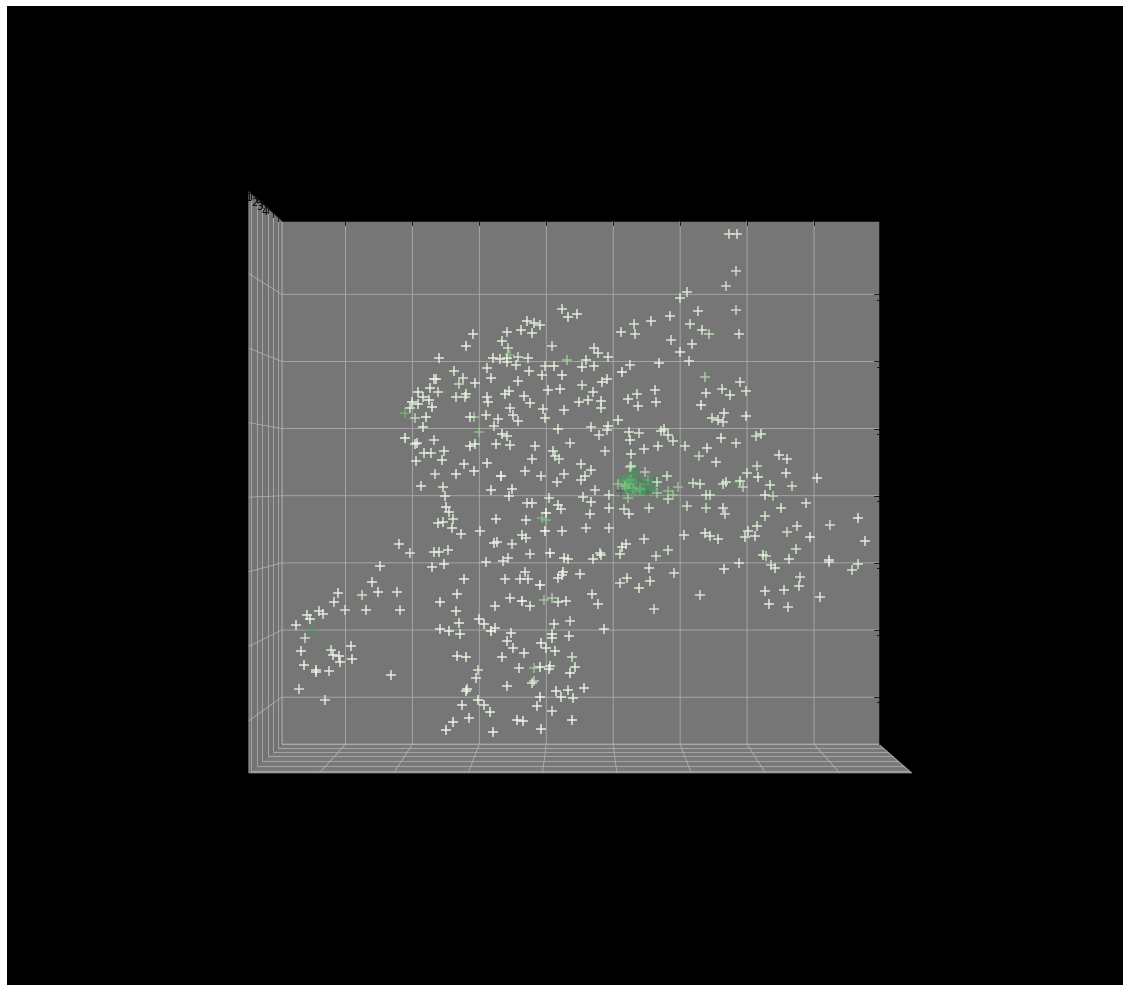

In [55]:
fig = plt.figure(figsize=(20, 18))
ax = fig.gca(projection='3d')
ax.view_init(-90, 0)
ax.set_facecolor('black')
X = df_rwanda['latitude']
Y = df_rwanda['longitude']
Z = df_rwanda['wealth_index']
ax.scatter3D(X, Y, Z, c=Z, cmap='Greens', s=100, marker='+')

In [61]:
X = df_rwanda[['latitude', 'longitude']]
y = df_rwanda['wealth_index']

print(np.shape(X), np.shape(y))

(492, 2) (492,)


In [67]:
X = np.resize(X, (X.shape[0], X.shape[1]))
y = np.resize(y, (y.shape[0], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [86]:
from scipy.linalg import cholesky, cho_solve
import numpy as np

class GaussianProcessRegression:
    
    def __init__(self, sigma=0, gamma=None):
        self.sigma = sigma
        self.gamma = gamma
        
        self.X = None
        self.y = None
        
        self.L = None
        self.alpha = None
        
    def kernel(self, x, y, gamma=0.1):
        return np.exp((-0.5 / gamma ** 2) * np.linalg.norm(x - y) ** 2)
        
    def train(self, X_train, y_train):
        self.X = X_train
        self.y = y_train
        
        # Choose hyperparameters based on maximizing the log-marginal likelihood
        #self.gamma =
        
        # Precompute quantities required for predictions which are independent of actual query points
        n, _ = np.shape(self.X)
        K_bb = [[self.kernel(self.X[i], self.X[j], self.gamma) for i in range(n)] for j in range(n)]
        K_bb += self.sigma**2 * np.identity(n)
        self.L = cholesky(K_bb, lower=True)
        self.alpha = cho_solve((self.L, True), self.y)
        
    def predict(self, X_test):
        n, _ = np.shape(self.X)
        p, _ = np.shape(X_test)
        
        K_aa = [[self.kernel(X_test[i], X_test[j], self.gamma) for j in range(p)] for i in range(p)]
        K_ab = [[self.kernel(X_test[i], self.X[j], self.gamma) for j in range(n)] for i in range(p)]
        #K_ba = K_ab.T
        
        #m = np.dot(K_ab, scipy.linalg.inv(np.dot(self.L.T, self.L))).dot(self.y)
        m_test = np.dot(K_ab, self.alpha)
        #m_test += self._y_train_mean
        
        return m_test

In [80]:
model = GaussianProcessRegression(sigma=0.001, gamma=0.01)
model.train(X_train, y_train)

In [81]:
c1 = np.linalg.norm(y_test - model.predict(X_test)) / y_test.shape[0]
c2 = np.linalg.norm(y_train - model.predict(X_train)) / y_train.shape[0]
print(c1, c2)

0.428467996769493 0.012022726178690981


In [109]:
alpha = np.linspace(0.001, 1., 1000)
test_costs = []
for x in alpha:
    model = GaussianProcessRegression(sigma=0.001, gamma=x)
    model.train(X_train, y_train)
    train_cost = np.linalg.norm(y_train - model.predict(X_train)) / y_train.shape[0]
    test_cost = np.linalg.norm(y_test - model.predict(X_test)) / y_test.shape[0]
    test_costs.append(test_cost)
    print(x, train_cost, test_cost)

0.001 4.022247162637558e-08 0.10519974026300698
0.002 4.006071034406016e-08 0.10188517921966331
0.003 3.9772278601327836e-08 0.10007170234926788
0.004 4.0203983724868375e-08 0.09728891684227632
0.005 4.3195304880553874e-08 0.09229803189164264
0.006 5.071027204638562e-08 0.08626717436874616
0.007 6.533695542312853e-08 0.08048858174659206
0.008 8.987471109693887e-08 0.07563346095587095
0.009000000000000001 1.2706342174638666e-07 0.072178010573549
0.010000000000000002 1.8046774627912754e-07 0.07090463760362929
0.011 2.56831259594519e-07 0.07264730228966697
0.012 3.693512392915367e-07 0.07748399697034558
0.013000000000000001 5.409966828737698e-07 0.08464838716124283
0.014000000000000002 8.080818348239328e-07 0.09330613568517664
0.015 1.2258977613263332e-06 0.10308149577515086
0.016 1.8800326459037149e-06 0.11401490368035959
0.017 2.9112179423298887e-06 0.12633151180031973
0.018000000000000002 4.570478428961599e-06 0.14027259020581476
0.019000000000000003 7.331648672322299e-06 0.15601217187

0.167 0.01630464638487401 0.21180759867436771
0.168 0.016350384232109185 0.20626463959161062
0.169 0.016396965413612137 0.20136231600608864
0.17 0.016444342369452778 0.19704875964683535
0.171 0.016492444787995653 0.1932573834986685
0.17200000000000001 0.016541184368350205 0.18990873045470918
0.17300000000000001 0.0165904603481074 0.18691379138430644
0.17400000000000002 0.016640164985264213 0.1841784098960578
0.17500000000000002 0.01669018854946752 0.1816082347142654
0.17600000000000002 0.0167404233329163 0.17911365111357053
0.177 0.016790766217780004 0.1766141929074896
0.178 0.016841120005243394 0.1740420871301555
0.179 0.016891393363493008 0.171344739073995
0.18 0.016941499850772278 0.16848610884605814
0.181 0.016991356277027338 0.16544704352458017
0.182 0.01704088089135893 0.16222468512118687
0.183 0.017089991638183224 0.15883112117902026
0.184 0.017138605013493992 0.15529143516322316
0.185 0.01718663556194079 0.1516413274804103
0.186 0.017233996182840255 0.14792444379194195
0.187 0.

0.336 0.020922180408021743 0.0548185622507993
0.337 0.020937873187350336 0.054846528213057286
0.338 0.02095354256929044 0.05487637853366326
0.339 0.02096919562852455 0.05490814186120847
0.34 0.020984839515444702 0.05494183878545281
0.341 0.021000481500099793 0.054977481242611995
0.342 0.021016129027300805 0.05501507197146753
0.343 0.021031789790005778 0.05505460438380109
0.34400000000000003 0.021047471707913795 0.055096061963186505
0.34500000000000003 0.021063183043271923 0.05513941853238577
0.34600000000000003 0.021078932346716255 0.05518463804553903
0.34700000000000003 0.021094728518730524 0.05523167496830914
0.34800000000000003 0.021110580793961727 0.055280474308087135
0.34900000000000003 0.02112649874291682 0.05533097210164844
0.35000000000000003 0.021142492250736354 0.0553830957700732
0.35100000000000003 0.021158571513109566 0.055436764559318105
0.35200000000000004 0.02117474696373198 0.05549189034744431
0.353 0.021191029267879177 0.0555483777740861
0.354 0.02120742925138335 0.055

0.502 0.0242537118041709 0.06081234948509703
0.503 0.02426844454017657 0.060842337313659976
0.504 0.02428312142492271 0.06087231961474342
0.505 0.024297744232752425 0.06090229323700026
0.506 0.024312314820759674 0.06093225512959814
0.507 0.02432683510693023 0.06096220269234912
0.508 0.024341307112060732 0.06099213341100419
0.509 0.02435573287899736 0.061022045013889435
0.51 0.024370114553646353 0.0610519358482378
0.511 0.024384454343853453 0.0610818041104362
0.512 0.024398754503941977 0.061111648639276754
0.513 0.024413017352956434 0.061141468382396466
0.514 0.02442724526694032 0.06117126275730904
0.515 0.024441440684890486 0.06120103136911354
0.516 0.024455606056311557 0.061230774195734236
0.517 0.02446974389972472 0.061260491429033746
0.518 0.02448385674558943 0.06129018359468841
0.519 0.024497947161194907 0.06131985170233925
0.52 0.024512017750613263 0.061349496771786735
0.521 0.024526071090752118 0.0613791201900222
0.522 0.024540109789645194 0.0614087235673025
0.523 0.0245541364688

0.674 0.026726119706480964 0.0658351496491396
0.675 0.026739316295331203 0.06586244036580206
0.676 0.026752502656039703 0.06588981487646958
0.677 0.02676567920103452 0.06591727625042419
0.678 0.026778846317707335 0.06594482726699223
0.679 0.02679200439075066 0.06597247062027323
0.68 0.026805153760344157 0.06600020884146822
0.681 0.02681829474570349 0.0660280443366588
0.682 0.0268314276917809 0.06605597948195376
0.683 0.02684455287325586 0.06608401638073967
0.684 0.026857670577370703 0.06611215722683544
0.685 0.02687078106546839 0.06614040379089411
0.686 0.026883884569472046 0.06616875783265795
0.687 0.02689698129463842 0.06619722101275753
0.6880000000000001 0.02691007144701543 0.06622579485080196
0.6890000000000001 0.026923155205980664 0.06625448061229919
0.6900000000000001 0.026936232712237832 0.0662832794789819
0.6910000000000001 0.02694930410533425 0.06631219251185554
0.6920000000000001 0.026962369495643176 0.06634122064578632
0.6930000000000001 0.02697542897963811 0.066370364482145

0.841 0.02871154876600512 0.07061135570728555
0.842 0.02872121235835846 0.07062976461934256
0.843 0.028730850249873523 0.07064800180288713
0.844 0.0287404627724166 0.07066606925972153
0.845 0.0287500502466875 0.07068396915459789
0.846 0.02875961297818049 0.07070170367274495
0.847 0.028769151285409546 0.07071927489202572
0.848 0.028778665524815963 0.07073668525893305
0.849 0.02878815598050012 0.07075393698944127
0.85 0.028797623005954422 0.07077103258903653
0.851 0.028807066904576753 0.07078797410031132
0.852 0.028816488013371385 0.07080476429476927
0.853 0.028825886671033845 0.0708214054761843
0.854 0.028835263169753683 0.07083790022849036
0.855 0.02884461786048955 0.07085425116567091
0.856 0.0288539510542741 0.07087046074748633
0.857 0.028863263076430484 0.07088653154632385
0.858 0.028872554222291326 0.0709024663472119
0.859 0.02888182484849166 0.07091826776972433
0.86 0.028891075225484 0.0709339384697589
0.861 0.028900305691652233 0.07094948120194103
0.862 0.028909516551965175 0.0709

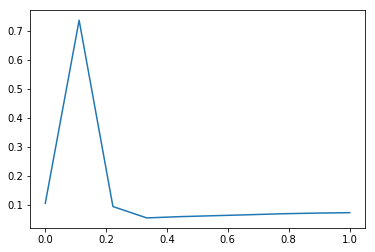

In [108]:
plt.plot(alpha, test_costs)
plt.show()

# Bibliographie

Gaussian Process theory : http://www.gaussianprocess.org/gpml/chapters/RW.pdf  
Deep Kernel Learning : https://arxiv.org/pdf/1511.02222.pdf  
CNN + GP for semi-supervised prediction : https://arxiv.org/pdf/1805.10407.pdf  